In [12]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.pyplot import MultipleLocator

In [13]:
#读取svg_NC_SDI 和score值

df_score0 = pd.read_csv('/home/syb/Code/coupling/python/file/gene/246_ROI/SDI_NC/geneexpression_xscore_0.csv',index_col= 0,header = 0) 
df_score1 = pd.read_csv('/home/syb/Code/coupling/python/file/gene/246_ROI/SDI_NC/geneexpression_xscore_1.csv',index_col= 0,header = 0) 
df_score2 = pd.read_csv('/home/syb/Code/coupling/python/file/gene/246_ROI/SDI_NC/geneexpression_xscore_2.csv',index_col= 0,header = 0) 
df_score = pd.concat([df_score0,df_score1,df_score2])
df_SDI_nc = pd.read_csv('/home/syb/Code/coupling/matlab/file/sub/surface/SDI/SDI_avg_nc.csv',header=None)


FileNotFoundError: [Errno 2] No such file or directory: '/home/syb/Code/coupling/python/file/gene/246_ROI/SDI_NC/geneexpression_xscore_0.csv'

In [ ]:
#读取NC_AD和score值
df_score0 = pd.read_csv('/home/syb/Code/coupling/python/file/gene/210_ROI/SDI_dif/NC_AD_50/expression_xscore_0.csv',index_col= 0,header = 0) 
df_score1 = pd.read_csv('/home/syb/Code/coupling/python/file/gene/210_ROI/SDI_dif/NC_AD_50/expression_xscore_1.csv',index_col= 0,header = 0) 
df_score2 = pd.read_csv('/home/syb/Code/coupling/python/file/gene/210_ROI/SDI_dif/NC_AD_50/expression_xscore_2.csv',index_col= 0,header = 0) 
df_score = pd.concat([df_score0,df_score1,df_score2])
df_SDI_nc = pd.read_csv('/home/syb/Code/coupling/matlab/file/sub/surface/SDI_diffirence/SDI_dif_NC_AD.csv',header=None)


In [ ]:


#读取NC_AD和score值
df_score0 = pd.read_csv('/home/syb/Code/coupling/python/file/gene/210_ROI/SDI_dif/NC_AD_50/expression_xscore_0.csv',index_col= 0,header = 0) 
df_score1 = pd.read_csv('/home/syb/Code/coupling/python/file/gene/210_ROI/SDI_dif/NC_AD_50/expression_xscore_1.csv',index_col= 0,header = 0) 
df_score2 = pd.read_csv('/home/syb/Code/coupling/python/file/gene/210_ROI/SDI_dif1/MC_AD_100/expression_xscore_NUM.csv',index_col= 0,header = 0) 
df_score = pd.concat([df_score0,df_score1,df_score2])
df_SDI_nc = pd.read_csv('/home/syb/Code/coupling/matlab/file/sub/surface/SDI_diffirence/SDI_dif_NC_AD.csv',header=None)


In [ ]:
np_score = np.array(df_score.values)
np_SDI_nc = df_SDI_nc.values
score_SDI = np.append(np_score[[1,4,7],:],np_SDI_nc[:,np.int0(np_score[0])],axis = 0).transpose()
df_plot = pd.DataFrame(score_SDI,columns=['score_FA','score_MD','score_NUM','FA','MD','NUM'])


In [39]:
MetaT = pd.read_csv(r'F:\Code\coupling\matlab\file\R2SN_coupling\meta_t_NC_AD_fn.csv', header=None)
MetaT.columns = ['metaT']
np_SDI_nc = MetaT.values
pls1 = pd.read_csv(r'F:\Code\coupling\python\R2SNcoupling\Gene\NC_AD_10\expression_xscore_r2snPlus and fn.csv',index_col= 0,header = 0)

pls = pls1.values


a =pls[1,:]
b = np_SDI_nc[np.int0(pls[0,:])]
c= np.append(b,a.reshape([238,1]),axis = 1)

df_plot = pd.DataFrame(c,columns=['T','score'])


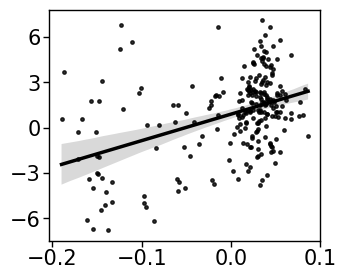

0.4179354435902981     1.769044361445059e-11


In [46]:



fig, ax = plt.subplots(figsize=(3.5, 3))

#sns.regplot(data=df_plot, x="score_FA", y="FA")

sns.regplot(data=df_plot, x="score", y="T",
    line_kws={"linewidth": 2.5},
    # color="black",
    scatter=True,
    scatter_kws={
        "s": 6,
        "alpha": 0.8,
    },
    color= "black",
)

#sns.regplot(data=df_plot, x="score_NUM", y="NUM")

#plt.xlim([-2, 32])
# plt.ylim([-0.1,1.1])

x_major_locator = MultipleLocator(0.1)
# 把x轴的刻度间隔设置为1，并存在变量里
y_major_locator = MultipleLocator(3)
ax.xaxis.set_major_locator(x_major_locator)
# 把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)

# plt.title(modelName+', r= '+ str(rp[0]) +', p = '+ str(rp[1]))
#设置坐标轴 刻度
plt.tick_params(labelsize=15, pad=2, length=4, width=1)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.spines["top"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.spines["right"].set_linewidth(1)
plt.show()

(r,p ) = pearsonr(df_plot['T'].values, df_plot['score'].values)
print(r, '   ',p)



In [7]:
def yf_sns_context(fontsize):

    conText={
    'axes.linewidth': 0.75, #坐标轴线宽为0.75
    'grid.linewidth': 0.75, #网格线宽为0.75
    'lines.linewidth': 1.0, #绘图线宽1.0
    'lines.markersize': 3.0, #散点的大小3.0
    'patch.linewidth': 1.0, #路径线宽1.0
    'xtick.major.width': 0.75, #下面这是主副刻度线的宽度
    'ytick.major.width': 0.75,
    'xtick.minor.width': 0.75,
    'ytick.minor.width': 0.75,
    'xtick.major.size': 2,
    'ytick.major.size': 2,
    'xtick.minor.size': 1.2,
    'ytick.minor.size': 1.2,
    'font.size': 7.5,#字号
    'axes.labelsize': fontsize,#xy坐标轴的字号
    'axes.titlesize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'legend.fontsize': fontsize,
    'legend.title_fontsize': fontsize
    }
    return conText